In [3]:
import datajoint as dj

In [4]:
import ephys
import matplotlib.pyplot as plt
%matplotlib inline

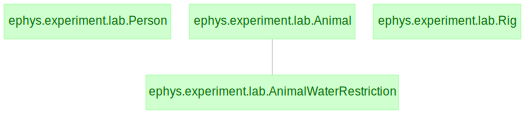

In [7]:
dj.ERD(ephys.experiment.lab)

In [ ]:
mouse=ephys.experiment.lab.Animal()
mouse

In [ ]:
person=ephys.experiment.lab.Person()
person

In [ ]:
rig=ephys.experiment.lab.Rig()
rig

In [ ]:
animalWaterRestriction=ephys.experiment.lab.AnimalWaterRestriction()
animalWaterRestriction

In [ ]:
trialNote = ephys.experiment.TrialNote()

In [ ]:
import numpy as np

In [ ]:
behaviorTrial = ephys.experiment.BehaviorTrial()

In [ ]:
behaviorTrial & 'animal = 123457' & 'session = 1'

In [ ]:
session = ephys.experiment.Session()
session & 'animal = 123457'

In [ ]:
outcome = (behaviorTrial & 'animal = 123457' & 'session=1').fetch('outcome', order_by='session')
early_lick = (behaviorTrial & 'animal = 123457' & 'session=1').fetch('early_lick', order_by='session')

In [ ]:
data = np.zeros(len(outcome))
data1 = np.zeros(len(early_lick))

In [ ]:
data[outcome=='hit'] = 1
data1[early_lick=='early'] = 1

In [ ]:
trial_note = (trialNote & 'animal = 123458' & 'session=14').fetch('trial_note', order_by='session')
results = list(map(int, trial_note))
protDiff = np.diff(results)
protChange = np.where(protDiff != 0)

In [ ]:
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

In [ ]:
yMA = movingaverage(data,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Proportion Correct')

In [ ]:
yMA = movingaverage(data1,200)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Early Licks')

In [ ]:
data